**데이터분석프로그래밍 중간고사 정답 코드**

1) example file.csv 파일을 업로드하여 파일에 있는 데이터로 dataframe을 생성하는 코드를 작성하시오.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving example file.csv to example file (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("example file.csv")

2) 생성된 dataframe에 대해서 하위 10개 row를 출력할 수 있는 코드를 작성하시오.

3) 생성된 dataframe에 대해서 행과 열의 갯수를 출력할 수 있는 코드를 작성하시오.

4) 생성된 dataframe에 대해서 수치형 데이터에 대한 주요 통계 정보를 요약하여 출력하는 코드를 작성하시오.

In [ ]:
print(df.tail(10))
print(df.shape)
print(df.describe())

     gender race/ethnicity parental level of education         lunch  \
990    male        group D                some college      standard   
991  female        group C          associate's degree      standard   
992    male        group C                some college      standard   
993  female        group A          associate's degree      standard   
994    male        group E                 high school  free/reduced   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
990                    none          67             55             53  
991                    none          87             93         

5) 생성된 dataframe의 column 이름을 아래와 같이 변경하는 코드를 작성하고, 상위 5개의 row를 출력해보시오.


*   race/ethnicity --> race_ethnicity
*   parental level of education --> education
*   test preparation course --> preparation_course


In [ ]:
df = df.rename(columns={"race/ethnicity":"race_ethnicity",
                        "parental level of education":"education",
                        "test preparation course":"preparation_course"})
print(df.head())

   gender race_ethnicity           education         lunch preparation_course  \
0    male        group A         high school      standard          completed   
1  female        group D    some high school  free/reduced               none   
2    male        group E        some college  free/reduced               none   
3    male        group B         high school      standard               none   
4    male        group E  associate's degree      standard          completed   

   math score  reading score  writing score  
0          67             67             63  
1          40             59             55  
2          59             60             50  
3          77             78             68  
4          78             73             68  


6) race_ethnicity의 각 group별로 male, female 각각 몇개의 row가 있는지 아래 그림과 같은 bar chart를 seaborn, matplotlib를 이용하여 만들어보시오.

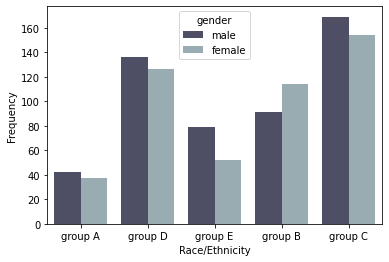

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x=df["race_ethnicity"], hue=df["gender"], palette="bone")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
plt.show()

7) 세 개의 시험 점수들 (math score, reading score, writing score) 사이의 상호 correlation을 heatmap으로 표현할 수 있는 코드를 seaborn을 이용하여 작성하시오. (아래와 같은 그림이 나와야 함)

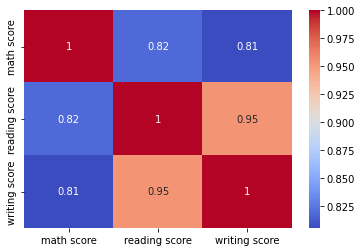

In [ ]:
df_score = df[["math score", "reading score", "writing score"]]
corr = df_score.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

8) 세 개의 시험 점수들 (math score, reading score, writing score)의 값의 분포를 histogram을 이용하여 만들어보시오. (아래와 같은 그림이 나와야 함)

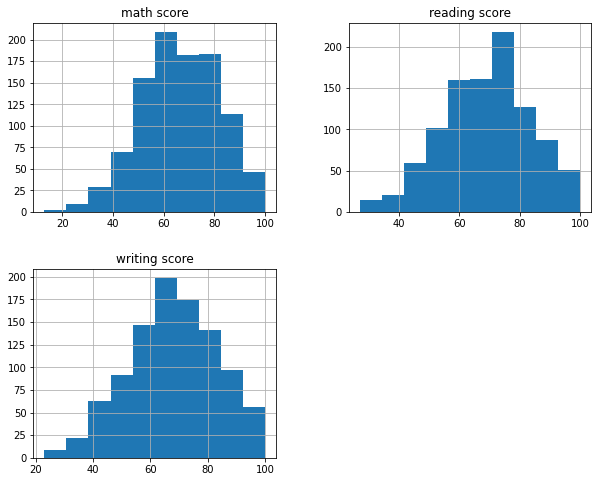

In [ ]:
df_score = df[["math score", "reading score", "writing score"]]
df_score.hist(figsize=(10,8));

9) 세 개의 시험 점수들(math score, reading score, writing score)을 합하여 score_sum 이라는 새로운 컬럼을 만들고, 결과 확인을 위해 상위 10개의 row를 출력해보시오. 이 과정에서 반드시 apply()와 lambda를 사용하시오.

In [ ]:
df["score_sum"] = df.apply(lambda x : x["math score"] + x["reading score"] + x["writing score"], axis=1)
print(df.head(10))

   gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   
5  female        group D                 high school      standard   
6  female        group A           bachelor's degree      standard   
7    male        group E                some college      standard   
8    male        group D                 high school      standard   
9    male        group C                some college  free/reduced   

  test preparation course  math score  reading score  writing score  score_sum  
0               completed          67             67             63        197  
1                    none          40             59             55

10) 세 개의 시험 점수들(math score, reading score, writing score)의 평균을 구하여 새로운 컬럼을 만들어서 값을 넣으시오. 아래 두 가지 방법을 이용하여 평균을 구할 수 있는 코드를 작성하시오.


*   func_score_avg_1()이라는 함수는 만들어서 apply(), lambda를 이용하여 평균을 구하는데, func_score_avg_1() 함수는 sum, n이라는 인자를 받는다. sum은 10번 문제에서 구한 score_sum 값을 인자로 넘겨주고, n은 과목의 수를 넘겨준다. 해당 함수를 이용하여 구한 평균값은 score_avg_1이라는 컬럼이름으로 넣는다.
*   func_score_avg_2()이라는 함수는 만들어서 apply(), lambda를 이용하여 평균을 구하는데, func_score_avg_2() 함수는 세 과목 점수에 대한 가변매개변수를 받는다. 즉, 세 과목 점수를 가변길이의 tuple형태로 넘겨주고 이를 받을 수 있는 함수를 작성하고, 이를 이용한 평균값은 score_avg_2이라는 컬럼이름으로 넣는다.

결과 확인을 위해 상위 10개의 row를 출력해보시오.

In [ ]:
def func_score_avg_1(sum, n):
    return sum/n

def func_score_avg_2(*scores):
    sum = 0
    for score in scores:
        sum += score
    return sum/len(scores)

df["score_avg_1"] = df.apply(lambda x : func_score_avg_1(x["score_sum"], 3), axis=1)
df["score_avg_2"] = df.apply(lambda x : func_score_avg_2(x["math score"], x["reading score"], x["writing score"]), axis=1)

#df = df.drop(["score_avg"], axis=1)
print(df.head(10))

   gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   
5  female        group D                 high school      standard   
6  female        group A           bachelor's degree      standard   
7    male        group E                some college      standard   
8    male        group D                 high school      standard   
9    male        group C                some college  free/reduced   

  test preparation course  math score  reading score  writing score  \
0               completed          67             67             63   
1                    none          40             59             55   
2               

11) 평균점수(score_avg_1)가 80점 이상인 학생들만 뽑아서 shape을 이용하여 조건을 만족하는 학생수를 확인하고, education별 학생수를 구하는 코드를 작성하시오.

In [ ]:
df_higher_80 = df.loc[df["score_avg_1"] >= 80]
print(df_higher_80.shape)

df_higher_80["education"].value_counts()

(211, 11)


associate's degree    46
some college          42
bachelor's degree     39
high school           32
master's degree       27
some high school      25
Name: education, dtype: int64

12) 통계테스트해보기

preparation_course을 "completed"한 그룹과 그렇지않은("none") 그룹간에 "math score" 평균 점수의 차이를 t-test로 검정하는 코드를 작성하시오. 유의수준(p-value)는 0.05 이하를 가정한다.

*   각 group에 대해서 평균과 표준편차를 구하여 출력한다.
*   두 그룹에 대한 t-test는 scipy에서 제공하는 ttest_ind()를 사용한다.
*   두 그룹간의 math score 분포를 가시화하기 위해 histplot을 사용하여 차트를 출력한다.

    gender race_ethnicity           education     lunch preparation_course  \
0     male        group A         high school  standard          completed   
4     male        group E  associate's degree  standard          completed   
7     male        group E        some college  standard          completed   
10    male        group E        some college  standard          completed   
11  female        group D         high school  standard          completed   

    math score  reading score  writing score  score_sum  score_avg_1  \
0           67             67             63        197    65.666667   
4           78             73             68        219    73.000000   
7           93             88             84        265    88.333333   
10          99             83             85        267    89.000000   
11          80             87             90        257    85.666667   

    score_avg_2  
0     65.666667  
4     73.000000  
7     88.333333  
10    89.000000  
11    85

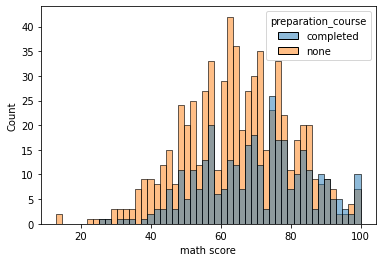

In [ ]:
df_group1 = df.loc[df["preparation_course"] == "completed"]
df_group2 = df.loc[df["preparation_course"] == "none"]

print(df_group1.head())
print(df_group1.shape)

print(df_group2.head())
print(df_group2.shape)

g1_math_score = df_group1["math score"]
g2_math_score = df_group2["math score"]

print("mean of group1: ", g1_math_score.mean())
print("std of group1: ", g1_math_score.std())

print("mean of group2: ", g2_math_score.mean())
print("std of group2: ", g2_math_score.std())

import scipy.stats as stats

t_stat, pval = stats.ttest_ind(g1_math_score, g2_math_score)
print("t_statistics", t_stat, " ", "p-value", pval)

if pval < 0.05:
    print("null hypothesis: samples are drawn from populations with the same population means")
    print("we can reject null hypothesis")
else:
    print("null hypothesis: samples are drawn from populations with the same population means")
    print("we cannot reject null hypothesis")


import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='math score', hue='preparation_course', bins=50)